In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import json

In [4]:
from pandas.io.json import json_normalize

In [5]:
cmd_lines = """
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --user_one_for_all_size 32  --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_trans_common_features --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_trans_mcc_features    --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_embeddings            --item_learn_embedding_size 32

python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --user_one_for_all_size 32  --user_learn_embedding_size 16 --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features --user_learn_embedding_size 16 --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_trans_common_features --user_learn_embedding_size 16 --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_trans_mcc_features    --user_learn_embedding_size 16 --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_embeddings            --user_learn_embedding_size 16 --item_learn_embedding_size 32

python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/                             --user_learn_embedding_size 32 --item_learn_embedding_size 32

python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --user_one_for_all_size 32  --use_embeddings --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features --use_embeddings --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_trans_common_features --use_embeddings --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_trans_mcc_features    --use_embeddings --item_learn_embedding_size 32

python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features --use_trans_common_features --use_trans_mcc_features                                                 --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/                             --use_trans_common_features --use_trans_mcc_features                                                 --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features                             --use_trans_mcc_features                                                 --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features --use_trans_common_features                                                                          --item_learn_embedding_size 32

python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features --use_trans_common_features --use_trans_mcc_features --use_embeddings                                --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/                             --use_trans_common_features --use_trans_mcc_features --use_embeddings                                --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features                             --use_trans_mcc_features --use_embeddings                                --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features --use_trans_common_features                          --use_embeddings                                --item_learn_embedding_size 32

python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features --use_trans_common_features --use_trans_mcc_features                  --user_learn_embedding_size 16 --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/                             --use_trans_common_features --use_trans_mcc_features                  --user_learn_embedding_size 16 --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features                             --use_trans_mcc_features                  --user_learn_embedding_size 16 --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features --use_trans_common_features                                           --user_learn_embedding_size 16 --item_learn_embedding_size 32

python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features --use_trans_common_features --use_trans_mcc_features --use_embeddings --user_learn_embedding_size 16 --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/                             --use_trans_common_features --use_trans_mcc_features --use_embeddings --user_learn_embedding_size 16 --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features                             --use_trans_mcc_features --use_embeddings --user_learn_embedding_size 16 --item_learn_embedding_size 32
python -m tinkoff_stories_recsys --data_path /data/kireev-ia/data_open_ds/data-like-tinkoff-2019/ --use_user_popular_features --use_trans_common_features                          --use_embeddings --user_learn_embedding_size 16 --item_learn_embedding_size 32

""";

In [6]:
len([1 for l in cmd_lines.split('\n') if len(l) > 10])

31

In [7]:
with open('/data/kireev-ia/pycharm-files/open_ds_metric_learning/tinkoff_stories_recsys_result.json', 'r') as f:
    df_data = json_normalize(json.load(f))

In [8]:
df_data['metrics_train_max'] = df_data['metrics'].apply(lambda x: np.max([i['roc_auc_mc_score'] for i in x]))

In [9]:
col_different = df_data.astype(str).nunique()[lambda x: x > 1].index.tolist()
col_different.remove('metrics')
col_different.remove('config.embedding_file_name')

In [10]:
df_data['name'] = df_data[[col for col in col_different if col.startswith('config.')]].gt(0) \
    .apply(lambda x: ', '.join([col[len('config.'):] for col in x[x].index.tolist()]), axis=1)

In [11]:
df_data[col_different].assign(rank=df_data['metrics_train_max'].rank(ascending=False))

,config.user_one_for_all_size,config.user_learn_embedding_size,config.use_user_popular_features,config.use_trans_common_features,config.use_trans_mcc_features,config.use_embeddings,final_score.roc_auc_mc_score,config.use_embedding_as_init,metrics_train_max,rank
0,32,0,False,False,False,False,0.577711,NaN,0.578104,30.0
1,0,0,True,False,False,False,0.582839,NaN,0.583752,20.0
2,0,0,False,True,False,False,0.539722,NaN,0.540481,38.0
3,0,0,False,False,True,False,0.539821,NaN,0.540121,39.0
4,0,0,False,False,False,True,0.581131,NaN,0.581376,23.0
5,32,16,False,False,False,False,0.576753,NaN,0.579245,29.0
6,0,16,True,False,False,False,0.585019,NaN,0.585019,16.0
7,0,16,False,True,False,False,0.568688,NaN,0.568688,36.0
8,0,16,False,False,True,False,0.569594,NaN,0.569594,35.0
9,0,16,False,False,False,True,0.580938,NaN,0.580938,27.0


In [12]:
# als like model
df_data[lambda x: x['config.user_learn_embedding_size'].eq(32)]['final_score.roc_auc_mc_score']

10    0.373666
Name: final_score.roc_auc_mc_score, dtype: float64

,name,final_score.roc_auc_mc_score,metrics_train_max,rank,+ learn_embedding,+ use_embeddings
0,user_one_for_all_size,0.577711,0.578104,3.0,0.579245,0.581217
1,use_user_popular_features,0.582839,0.583752,1.0,0.585019,0.585778
2,use_trans_common_features,0.539722,0.540481,4.0,0.568688,0.580020
3,use_trans_mcc_features,0.539821,0.540121,5.0,0.569594,0.582926
4,use_embeddings,0.581131,0.581376,2.0,0.580938,NaN


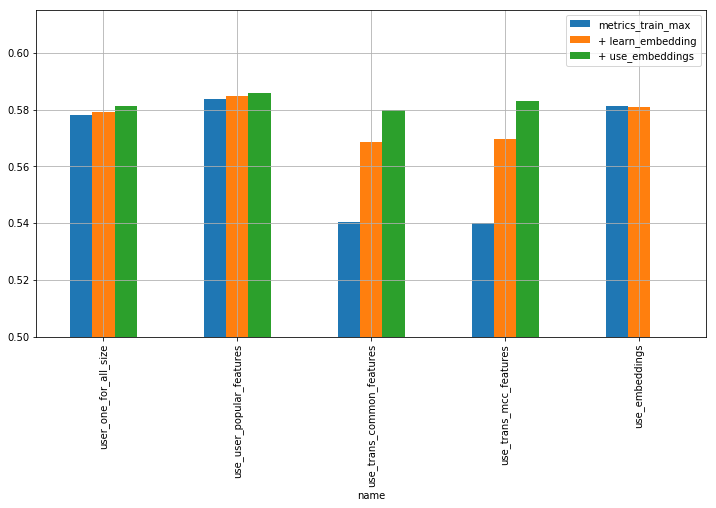

In [13]:
_t = df_data.iloc[0:5][['name', 'final_score.roc_auc_mc_score', 'metrics_train_max']] \
    .assign(rank=df_data.iloc[0:5]['metrics_train_max'].rank(ascending=False))
_t['+ learn_embedding'] = df_data.iloc[5:10]['metrics_train_max'].reset_index(drop=True)
_t['+ use_embeddings'] = df_data.iloc[11:15]['metrics_train_max'].reset_index(drop=True)
display(_t)
_t.set_index('name')[['metrics_train_max', '+ learn_embedding', '+ use_embeddings']] \
    .plot(kind='bar', ylim=(0.5, None), grid=True, figsize=(12, 6))

In [14]:
df_data.iloc[15:][col_different].assign(rank=df_data.iloc[15:]['metrics_train_max'].rank(ascending=False))

,config.user_one_for_all_size,config.user_learn_embedding_size,config.use_user_popular_features,config.use_trans_common_features,config.use_trans_mcc_features,config.use_embeddings,final_score.roc_auc_mc_score,config.use_embedding_as_init,metrics_train_max,rank
15,0,0,True,True,True,False,0.589029,NaN,0.589365,6.0
16,0,0,False,True,True,False,0.541012,NaN,0.541592,25.0
17,0,0,True,False,True,False,0.587466,NaN,0.587782,11.0
18,0,0,True,True,False,False,0.589942,NaN,0.589942,5.0
19,0,0,True,True,True,True,0.586618,NaN,0.586883,12.0
20,0,0,False,True,True,True,0.579855,NaN,0.581190,19.0
21,0,0,True,False,True,True,0.584530,NaN,0.584530,16.0
22,0,0,True,True,False,True,0.585293,NaN,0.588768,7.0
23,0,16,True,True,True,False,0.589305,NaN,0.591617,1.0
24,0,16,False,True,True,False,0.574413,NaN,0.575309,21.0


,name,final_score.roc_auc_mc_score,metrics_train_max,rank,+ use_embeddings,+ learn_embedding,+ learn + use
0,"use_user_popular_features, use_trans_common_fe...",0.589029,0.589365,2.0,0.586883,0.591617,0.587908
1,"use_trans_common_features, use_trans_mcc_features",0.541012,0.541592,4.0,0.581190,0.575309,0.584935
2,"use_user_popular_features, use_trans_mcc_features",0.587466,0.587782,3.0,0.584530,0.588730,0.582853
3,"use_user_popular_features, use_trans_common_fe...",0.589942,0.589942,1.0,0.588768,0.591366,0.587960


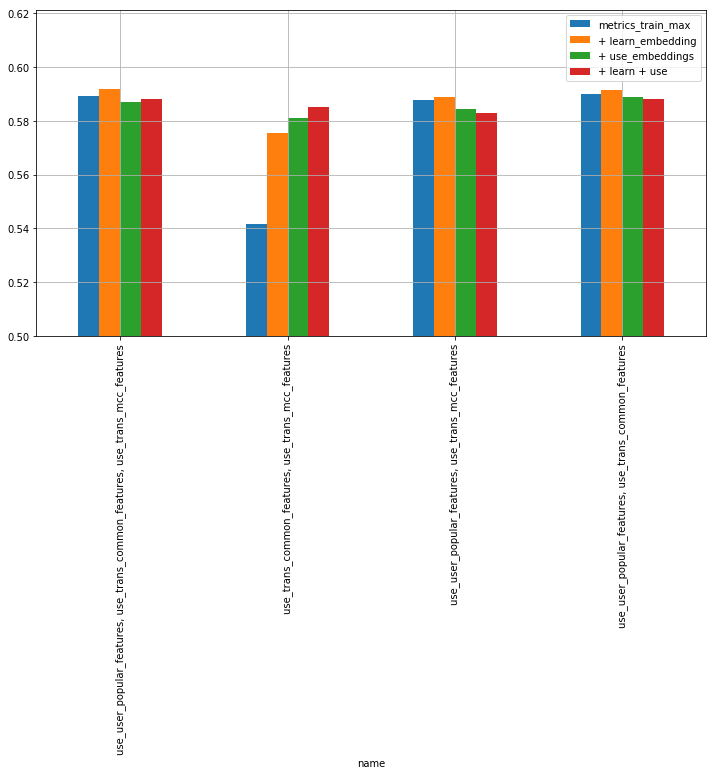

In [16]:
_t = df_data.iloc[15:15+4][['name', 'final_score.roc_auc_mc_score', 'metrics_train_max']] \
    .assign(rank=df_data.iloc[15:19]['metrics_train_max'].rank(ascending=False)).reset_index(drop=True)
_t['+ use_embeddings'] = df_data.iloc[19:23]['metrics_train_max'].reset_index(drop=True)
_t['+ learn_embedding'] = df_data.iloc[23:27]['metrics_train_max'].reset_index(drop=True)
_t['+ learn + use'] = df_data.iloc[27:31]['metrics_train_max'].reset_index(drop=True)
display(_t)
_t.set_index('name')[['metrics_train_max', '+ learn_embedding', '+ use_embeddings',
                      '+ learn + use']] \
    .plot(kind='bar', ylim=(0.5, None), grid=True, figsize=(12, 6))